In [18]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.stats import expon


In [19]:
# Example text from web scraping youtube
text = """ What I want to discuss a little bit in this video is the idea of a random variable. And random variables at first can be a little bit confusing because we will want to think of them as traditional variables that you were first exposed to in algebra class. And that's not quite what random variables are. Random variables are really ways to map outcomes of random processes to numbers. So if you have a random process, like you're flipping a coin or you're rolling dice or you are measuring the rain that might fall tomorrow, so random process, you're really just mapping outcomes of that to numbers. You are quantifying the outcomes. So what's an example of a random variable? Well, let's define one right over here. So I'm going to define random variable capital X. And they tend to be denoted by capital letters. So random variable capital X, I will define it as-- It is going to be equal to 1 if my fair die rolls heads-- let me write it this way-- if heads. And it's going to be equal to 0 if tails. I could have defined this any way I wanted to. This is actually a fairly typical way of defining a random variable, especially for a coin flip. But I could have defined this as 100. And I could have defined this as 703. And this would still be a legitimate random variable. It might not be as pure a way of thinking about it as defining 1 as heads and 0 as tails. But that would have been a random variable. Notice we have taken this random process, flipping a coin, and we've mapped the outcomes of that random process. And we've quantified them. 1 if heads, 0 if tails. We can define another random variable capital Y as equal to, let's say, the sum of rolls of let's say 7 dice. And when we talk about the sum, we're talking about the sum of the 7-- let me write this-- the sum of the upward face after rolling 7 dice. Once again, we are quantifying an outcome for a random process where the random process is rolling these 7 dice and seeing what sides show up on top. And then we are taking those and we're taking the sum and we are defining a random variable in that way. So the natural question you might ask is, why are we doing this? What's so useful about defining random variables like this? It will become more apparent as we get a little bit deeper in probability. But the simple way of thinking about it is as soon as you quantify outcomes, you can start to do a little bit more math on the outcomes. And you can start to use a little bit more mathematical notation on the outcome. So for example, if you cared about the probability that the sum of the upward faces after rolling seven dice-- if you cared about the probability that that sum is less than or equal to 30, the old way that you would have to have written it is the probability that the sum of-- and you would have to write all of what I just wrote here-- is less than or equal to 30. You would have had to write that big thing. And then you would try to figure it out somehow if you had some information. But now we can just write the probability that capital Y is less than or equal to 30. It's a little bit cleaner notation. And if someone else cares about the probability that this sum of the upward face after rolling seven dice-- if they say, hey, what's the probability that that's even, instead of having to write all that over, they can say, well, what's the probability that Y is even? Now the one thing that I do want to emphasize is how these are different than traditional variables, traditional variables that you see in your algebra class like x plus 5 is equal to 6, usually denoted by lowercase variables. y is equal to x plus 7. These variables, you can essentially assign values. You either can solve for them-- so in this case, x is an unknown. You could subtract 5 from both sides and solve for x. Say that x is going to be equal to 1. In this case, you could say, well, x is going to vary. We can assign a value to x and see how y varies as a function of x. You can either assign a variable, you can assign values to them. Or you can solve for them. You could say, hey x is going to be 1 in this case. That's not going to be the case with a random variable. A random variable can take on many, many, many, many, many, many different values with different probabilities. And it makes much more sense to talk about the probability of a random variable equaling a value, or the probability that it is less than or greater than something, or the probability that it has some property. And you see that in either of these cases. In the next video, we'll continue this discussion and we'll talk a little bit about the types of random variables you can have."""
blob = TextBlob(text)


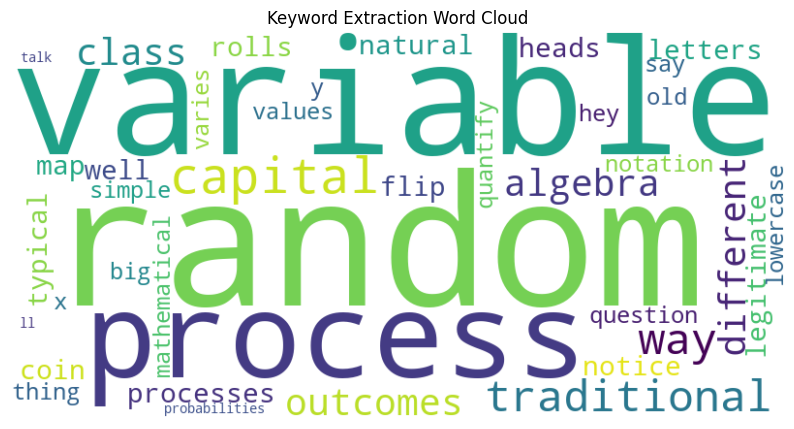

In [20]:
# Keyword Extraction

# noun phrase extraction
noun_phrases = blob.noun_phrases

# combine into a single string
keywords_text = ' '.join(noun_phrases)

# generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(keywords_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Keyword Extraction Word Cloud')
plt.axis('off')  
plt.box(False) 
plt.show()


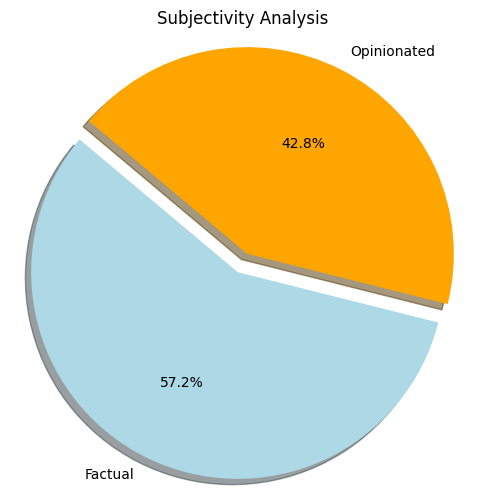

Subjectivity Score: 0.42802639127940345


In [21]:
# Subjectivity Analysis

# calculate the subjectivity score 
subjectivity_score = blob.sentiment.subjectivity

# pie chart labels
labels = ['Factual', 'Opinionated']
sizes = [1 - subjectivity_score, subjectivity_score]
colors = ['lightblue', 'orange']
explode = (0, 0.1)

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Subjectivity Analysis')
plt.axis('equal')
plt.show()

print("Subjectivity Score:", subjectivity_score)


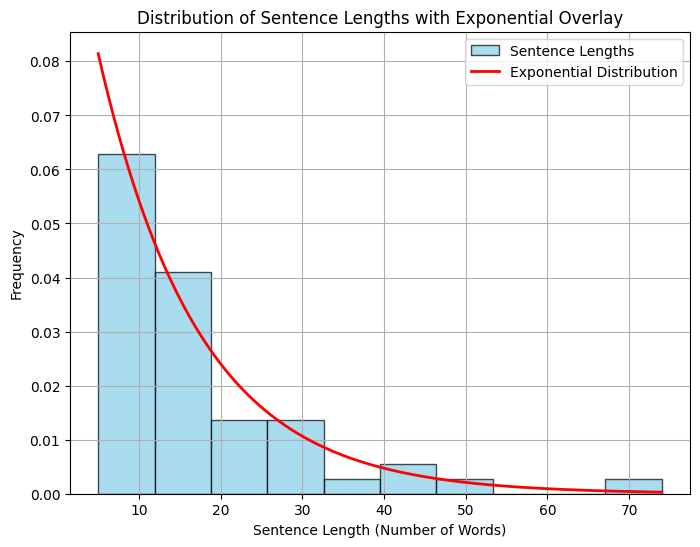

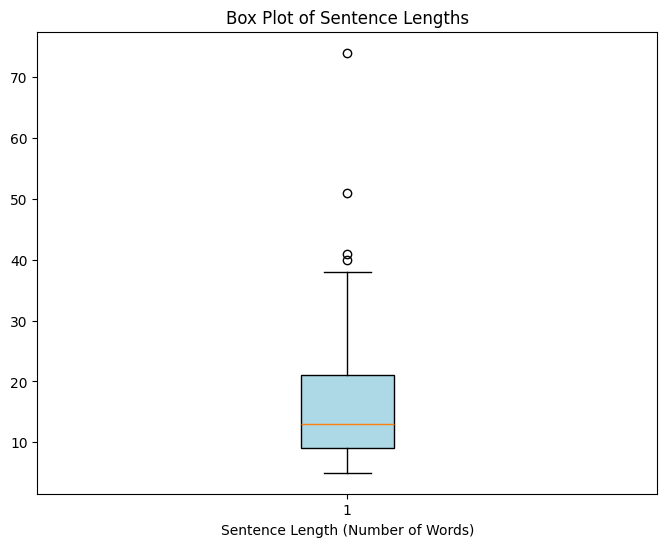

In [22]:
# Sentence Lengths

# lengths of all sentences in way of number of words
sentence_lengths = [len(sentence.words) for sentence in blob.sentences]

# histogram of sentence lengths
plt.figure(figsize=(8, 6))
plt.hist(sentence_lengths, bins=10, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Sentence Lengths')

# exponential distribution
min_length = min(sentence_lengths)
max_length = max(sentence_lengths)
x = np.linspace(min_length, max_length, 1000)
scale_param = np.mean(sentence_lengths) - min_length  
plt.plot(x, expon.pdf(x - min_length, scale=scale_param), color='red', linewidth=2, label='Exponential Distribution')

plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Frequency')
plt.title('Distribution of Sentence Lengths with Exponential Overlay')
plt.legend()
plt.grid(True)
plt.show()

# box plot of sentence lengths
plt.figure(figsize=(8, 6))
box = plt.boxplot(sentence_lengths, patch_artist=True)
plt.xlabel('Sentence Length (Number of Words)')
plt.title('Box Plot of Sentence Lengths')
for patch in box['boxes']:
    patch.set_facecolor('lightblue') 
plt.grid(False) 
plt.show()


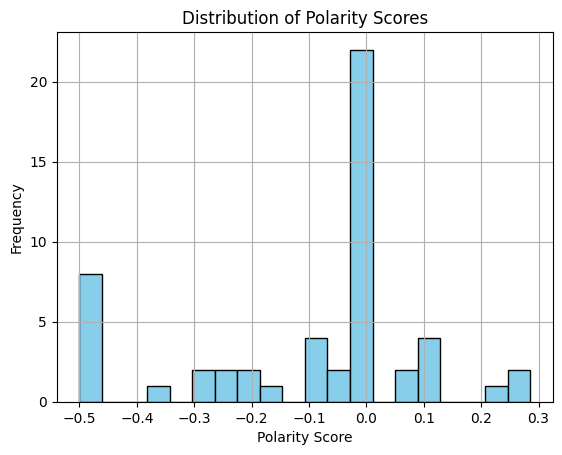

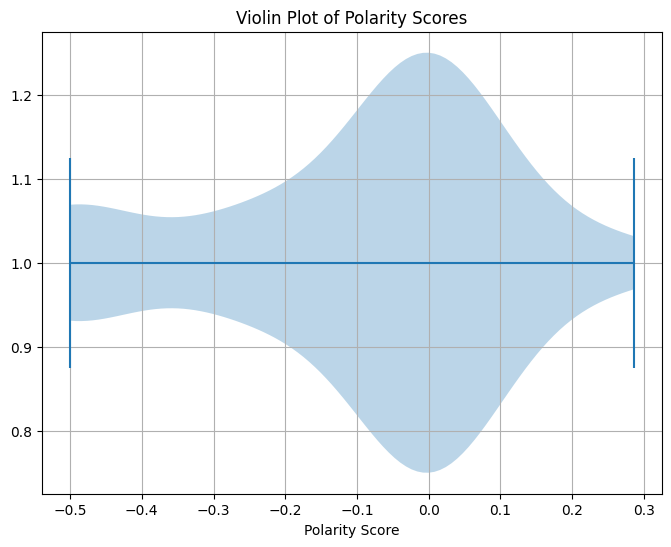

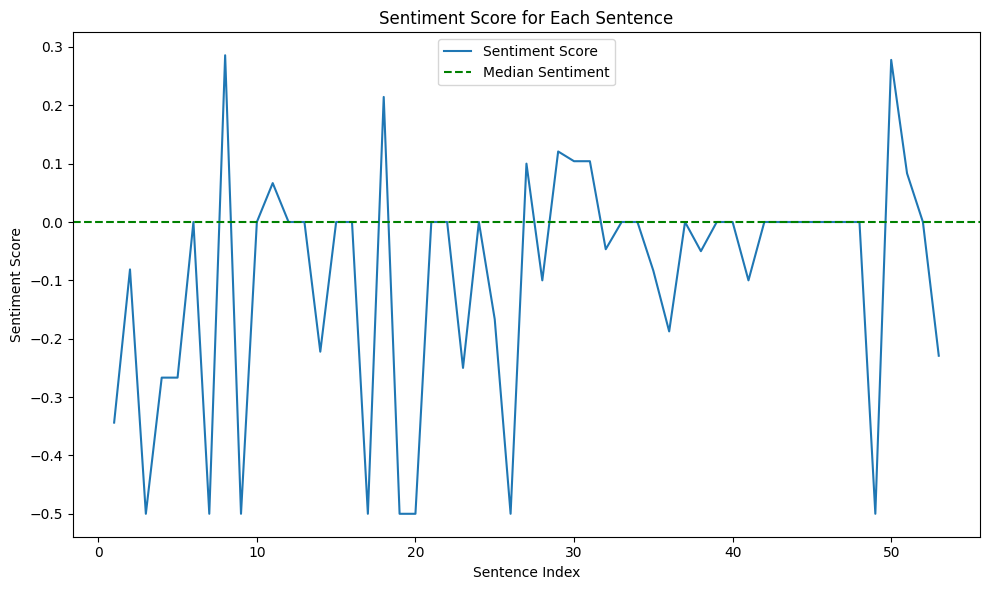

In [23]:
# Sentiment Analysis

# calculate polarity scores
polarity_scores = [sentence.sentiment.polarity for sentence in blob.sentences]

# histogram of polarity
plt.hist(polarity_scores, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of Polarity Scores')
plt.grid(True)
plt.show()


# violin plot
plt.figure(figsize=(8, 6))
plt.violinplot(polarity_scores, vert=False)
plt.xlabel('Polarity Score')
plt.title('Violin Plot of Polarity Scores')
plt.grid(True)
plt.show()


# sentiment score
sentiment_scores = [sentence.sentiment.polarity for sentence in blob.sentences]

# indexing the sentences
sentence_indices = np.arange(1, len(blob.sentences) + 1)

median_sentiment = np.median(sentiment_scores)

# line plot
plt.figure(figsize=(10, 6))
plt.plot(sentence_indices, sentiment_scores, linestyle='-', label='Sentiment Score')

plt.axhline(y=median_sentiment, color='green', linestyle='--', label='Median Sentiment')
plt.xlabel('Sentence Index')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score for Each Sentence')
plt.legend()
plt.tight_layout()
plt.show()


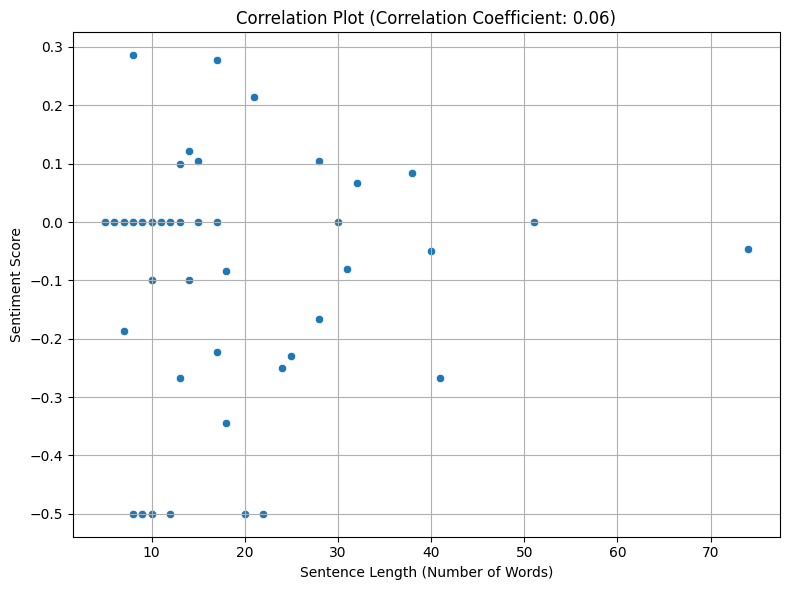

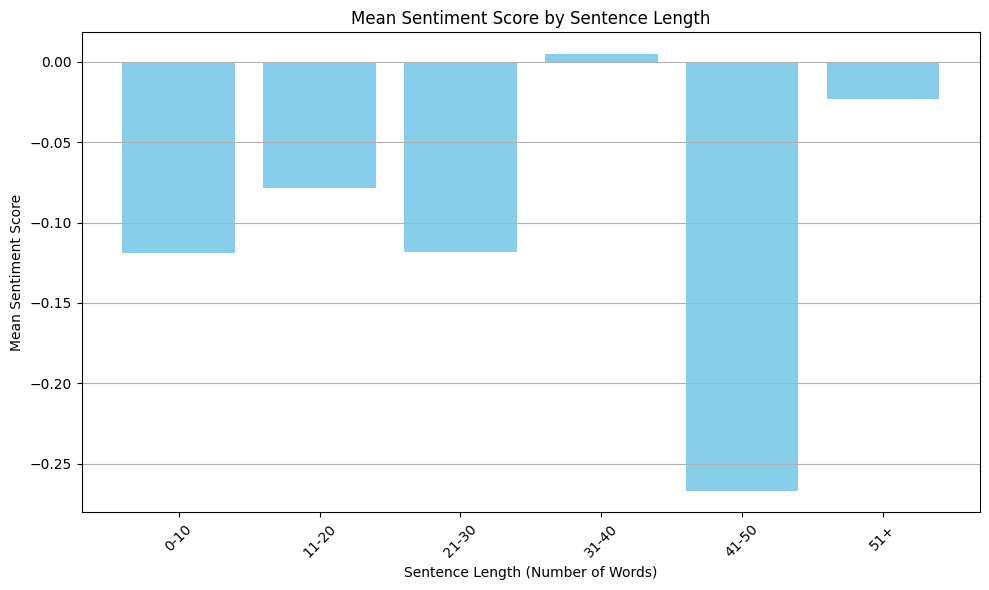

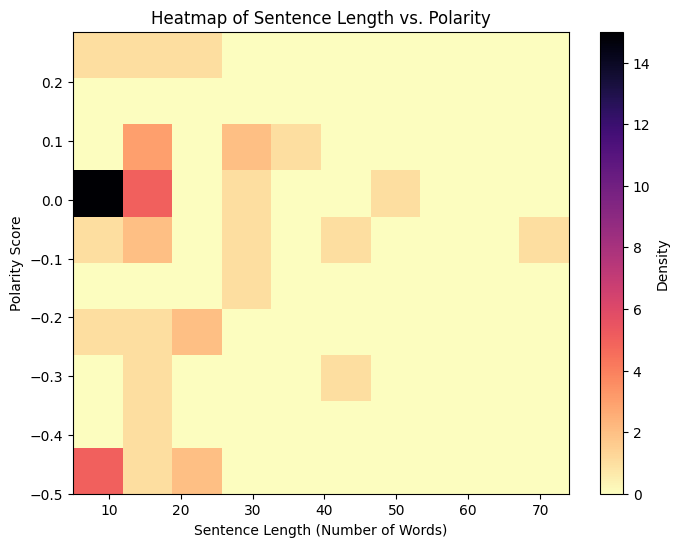

In [24]:
# Sentence Length and Sentiment Analysis

# polarity of each sentence
sentence_polarities = [sentence.sentiment.polarity for sentence in blob.sentences]

# Data Frame
data = {'Sentence Length': sentence_lengths, 'Sentiment Score': sentiment_scores}
df = pd.DataFrame(data)

# correlation coefficient
correlation = df['Sentence Length'].corr(df['Sentiment Score'])

# Plot scatter
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sentence Length', y='Sentiment Score')
plt.title(f'Correlation Plot (Correlation Coefficient: {correlation:.2f})')
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Sentiment Score')
plt.grid(True)
plt.tight_layout()
plt.show()



bins = [0, 10, 20, 30, 40, 50, np.inf]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51+']

binned_lengths = pd.cut(sentence_lengths, bins=bins, labels=labels)

# data frame
data = {'Sentence Length': sentence_lengths, 'Sentiment Score': sentiment_scores, 'Binned Length': binned_lengths}
df = pd.DataFrame(data)

grouped_df = df.groupby('Binned Length').mean()

# stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_df.index, grouped_df['Sentiment Score'], color='skyblue')
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score by Sentence Length')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



# heatmap
plt.figure(figsize=(8, 6))
plt.hist2d(sentence_lengths, polarity_scores, bins=(10, 10), cmap='magma_r')
plt.colorbar(label='Density')
plt.xlabel('Sentence Length (Number of Words)')
plt.ylabel('Polarity Score')
plt.title('Heatmap of Sentence Length vs. Polarity')
plt.show()
